# Stock Skewness Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2016-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD'

In [3]:
df = yf.download("AMD", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
def skewness(returns):
    stock_skewness = scs.skew(returns)
    return stock_skewness

Text(0, 0.5, 'Skewness')

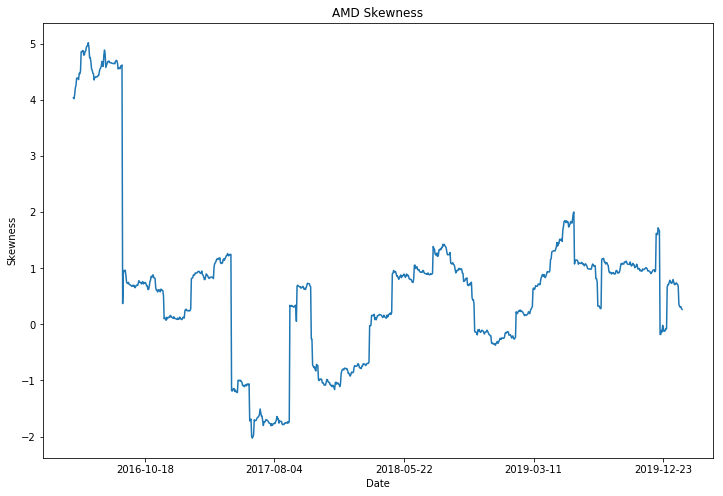

In [6]:
# Compute the running skewness
running = [skewness(returns[i-90:i]) for i in range(90, len(returns))]

# Plot running skewness up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Skewness')
plt.xlabel('Date')
plt.ylabel('Skewness')

In [7]:
sk = skewness(returns)
sk

1.7694206134300705

In [8]:
running = [skewness(returns[i-90:i]) for i in range(90, len(returns))]
running

[4.0366189785220765,
 4.021526008105472,
 4.095283455332228,
 4.214511123972115,
 4.257936365903372,
 4.386685323957149,
 4.381832316737757,
 4.39107758323456,
 4.361809557396329,
 4.473200632999391,
 4.464388212711199,
 4.517321651123989,
 4.855406296833988,
 4.858990510370653,
 4.87440234247432,
 4.877843691424889,
 4.796489799782609,
 4.802077059653875,
 4.864458371180349,
 4.871048071540071,
 4.935726152814788,
 4.960971625786929,
 4.963980514382576,
 5.01872746262955,
 4.929581779081356,
 4.752276226818454,
 4.753762129774159,
 4.678554508627451,
 4.552913678159393,
 4.5281203918542525,
 4.477497540650763,
 4.461333740797927,
 4.354596144298314,
 4.39915977212435,
 4.404314466965727,
 4.414519624626744,
 4.409158952402677,
 4.411535797412412,
 4.433076067929845,
 4.434899147078745,
 4.500213553095199,
 4.548877822812362,
 4.568299485976474,
 4.59621735493995,
 4.683641824975699,
 4.600828117943514,
 4.59629041046018,
 4.7954213377404535,
 4.887236350677666,
 4.814678393031053,
 4.